In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder

In [35]:
# Load data from CSV file
df = pd.read_csv('styles.csv')

In [36]:
label_encoder = LabelEncoder()
df['season'] = label_encoder.fit_transform(df['season'])

# Split features and labels
X = df.drop(['season'], axis=1).values
y = df['season'].values

In [37]:
# Check for missing values
print(df.isnull().sum())

id                0
gender            0
masterCategory    0
subCategory       0
articleType       0
season            0
year              0
usage             0
dtype: int64


In [38]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN

In [39]:
#CNN
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models

In [40]:
# Define neural network architecture
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y_train)), activation='softmax')  # Output layer with softmax activation
])


In [41]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


Epoch 1/10
45/45 [==============================] - 1s 6ms/step - loss: 545.4832 - accuracy: 0.3375 - val_loss: 165.8540 - val_accuracy: 0.1250
Epoch 2/10
45/45 [==============================] - 0s 2ms/step - loss: 138.3061 - accuracy: 0.3834 - val_loss: 38.9264 - val_accuracy: 0.4500
Epoch 3/10
45/45 [==============================] - 0s 2ms/step - loss: 125.4289 - accuracy: 0.4022 - val_loss: 82.0443 - val_accuracy: 0.5625
Epoch 4/10
45/45 [==============================] - 0s 2ms/step - loss: 102.5454 - accuracy: 0.4231 - val_loss: 170.9019 - val_accuracy: 0.3500
Epoch 5/10
45/45 [==============================] - 0s 2ms/step - loss: 159.0660 - accuracy: 0.3897 - val_loss: 162.4442 - val_accuracy: 0.1875
Epoch 6/10
45/45 [==============================] - 0s 2ms/step - loss: 115.0056 - accuracy: 0.4370 - val_loss: 44.8897 - val_accuracy: 0.5688
Epoch 7/10
45/45 [==============================] - 0s 2ms/step - loss: 120.4305 - accuracy: 0.4141 - val_loss: 145.4761 - val_accuracy: 0.

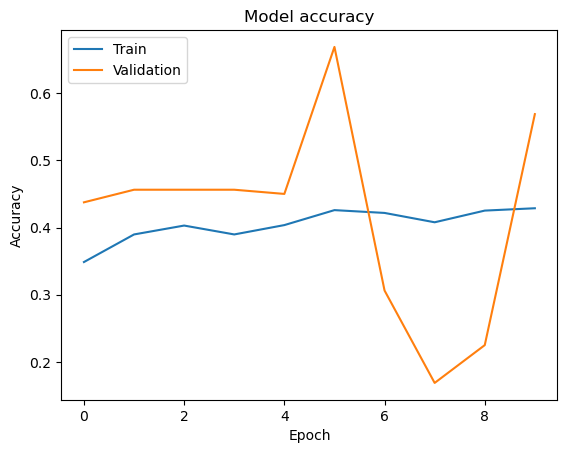

In [26]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


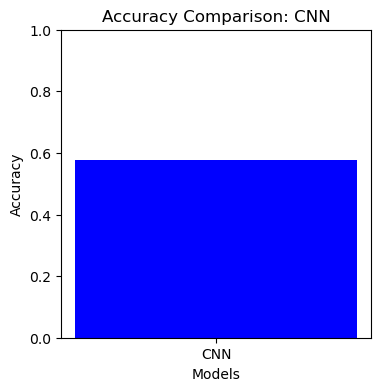

In [27]:
import matplotlib.pyplot as plt

# Sample data
label = ['CNN']
accuracies = [test_acc]

# Adjusting figure size
plt.figure(figsize=(4, 4))  # Change width and height as needed

# Plotting the bar graph
plt.bar(label, accuracies, color=['blue'], width=0.1)  # Adjust width as needed

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: CNN')
plt.ylim(0.0, 1.0)  # Set the y-axis limit from 0 to 1

# Display the plot
plt.show()


In [28]:
from sklearn.metrics import precision_score
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels based on a threshold
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

print("Precision:", precision)

13/13 [==============================] - 0s 2ms/step
Precision: 0.47330927051671734


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.metrics import recall_score

# Make predictions on test data
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

print("Recall:", recall)

13/13 [==============================] - 0s 4ms/step
Recall: 0.5775


In [30]:
from sklearn.metrics import f1_score
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute F1 score
f1score = f1_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1score)

13/13 [==============================] - 0s 3ms/step
F1 Score: 0.4876774634556736


# RNN

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models

In [7]:
# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [8]:
# Define RNN architecture (using LSTM)
model = models.Sequential([
    layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])


In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc1 = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc1)

Epoch 1/10
45/45 [==============================] - 3s 14ms/step - loss: 1.2834 - accuracy: 0.4927 - val_loss: 1.2448 - val_accuracy: 0.4563
Epoch 2/10
45/45 [==============================] - 0s 4ms/step - loss: 1.1693 - accuracy: 0.4955 - val_loss: 1.2019 - val_accuracy: 0.4563
Epoch 3/10
45/45 [==============================] - 0s 4ms/step - loss: 1.1433 - accuracy: 0.4955 - val_loss: 1.1864 - val_accuracy: 0.4563
Epoch 4/10
45/45 [==============================] - 0s 4ms/step - loss: 1.1129 - accuracy: 0.5087 - val_loss: 1.1524 - val_accuracy: 0.5688
Epoch 5/10
45/45 [==============================] - 0s 4ms/step - loss: 1.0981 - accuracy: 0.5755 - val_loss: 1.1476 - val_accuracy: 0.5562
Epoch 6/10
45/45 [==============================] - 0s 4ms/step - loss: 1.0885 - accuracy: 0.5665 - val_loss: 1.1494 - val_accuracy: 0.4563
Epoch 7/10
45/45 [==============================] - 0s 4ms/step - loss: 1.1091 - accuracy: 0.5351 - val_loss: 1.1817 - val_accuracy: 0.4563
Epoch 8/10
45/45 [=

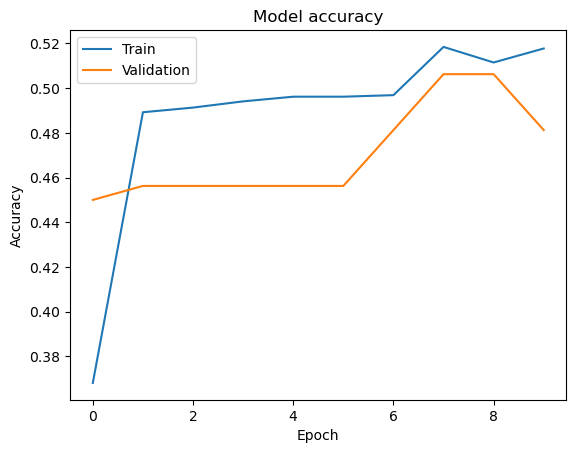

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


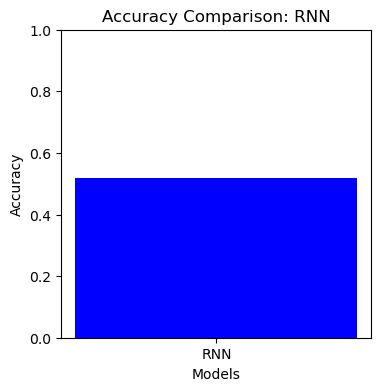

In [38]:
import matplotlib.pyplot as plt

# Sample data
label = ['RNN']
accuracies = [test_acc1]

# Adjusting figure size
plt.figure(figsize=(4, 4))  # Change width and height as needed

# Plotting the bar graph
plt.bar(label, accuracies, color=['blue'], width=0.1)  # Adjust width as needed

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: RNN')
plt.ylim(0.0, 1.0)  # Set the y-axis limit from 0 to 1

# Display the plot
plt.show()


In [39]:
from sklearn.metrics import precision_score
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels based on a threshold
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

print("Precision:", precision)

13/13 [==============================] - 1s 3ms/step
Precision: 0.4929247223364871


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
from sklearn.metrics import recall_score
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

print("Recall:", recall)

13/13 [==============================] - 0s 3ms/step
Recall: 0.52


In [11]:
from sklearn.metrics import f1_score
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute F1 score
f1score = f1_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1score)

13/13 [==============================] - 0s 3ms/step
F1 Score: 0.3339754970339998


# GRU

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models

In [20]:
# Reshape features for GRU input (assuming sequential data)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [21]:
# Define GRU architecture
model = models.Sequential([
    layers.GRU(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with softmax activation
])


In [22]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # Include accuracy metric

In [23]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc2 = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc2)

Epoch 1/10
45/45 [==============================] - 3s 12ms/step - loss: 1.2673 - accuracy: 0.4697 - val_loss: 1.1652 - val_accuracy: 0.6562
Epoch 2/10
45/45 [==============================] - 0s 4ms/step - loss: 1.0790 - accuracy: 0.5651 - val_loss: 1.1134 - val_accuracy: 0.6562
Epoch 3/10
45/45 [==============================] - 0s 4ms/step - loss: 1.0661 - accuracy: 0.5665 - val_loss: 1.0514 - val_accuracy: 0.6562
Epoch 4/10
45/45 [==============================] - 0s 4ms/step - loss: 1.0682 - accuracy: 0.5748 - val_loss: 1.0867 - val_accuracy: 0.5875
Epoch 5/10
45/45 [==============================] - 0s 4ms/step - loss: 1.0588 - accuracy: 0.5630 - val_loss: 1.0249 - val_accuracy: 0.6625
Epoch 6/10
45/45 [==============================] - 0s 4ms/step - loss: 1.0675 - accuracy: 0.5783 - val_loss: 1.1052 - val_accuracy: 0.6313
Epoch 7/10
45/45 [==============================] - 0s 4ms/step - loss: 1.0397 - accuracy: 0.5894 - val_loss: 1.1263 - val_accuracy: 0.6562
Epoch 8/10
45/45 [=

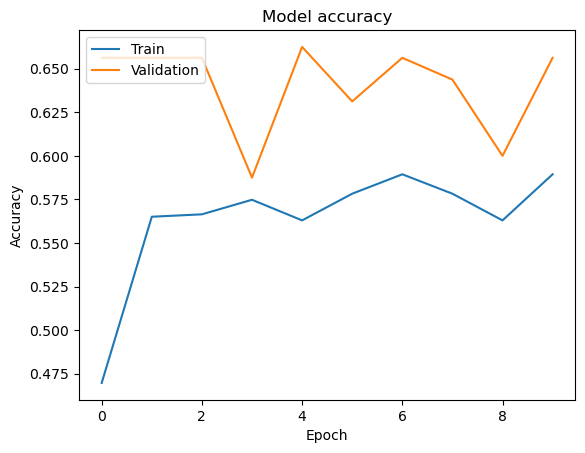

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


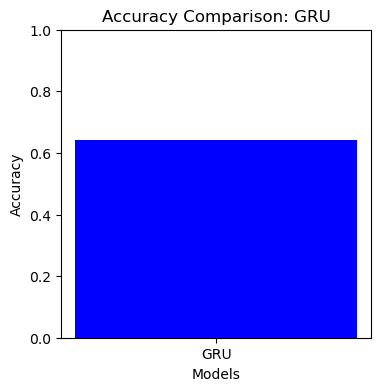

In [25]:
import matplotlib.pyplot as plt

# Sample data
label = ['GRU']
accuracies = [test_acc2]

# Adjusting figure size
plt.figure(figsize=(4, 4))  # Change width and height as needed

# Plotting the bar graph
plt.bar(label, accuracies, color=['blue'], width=0.1)  # Adjust width as needed

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: GRU')
plt.ylim(0.0, 1.0)  # Set the y-axis limit from 0 to 1

# Display the plot
plt.show()


In [26]:
from sklearn.metrics import precision_score
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels based on a threshold
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

13/13 [==============================] - 0s 3ms/step
Precision: 0.49243189574461665


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
from sklearn.metrics import recall_score
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)
# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)
# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

13/13 [==============================] - 0s 2ms/step
Recall: 0.6425


In [28]:
from sklearn.metrics import f1_score
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)
# Compute F1 score
f1score = f1_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1score)

13/13 [==============================] - 0s 2ms/step
F1 Score: 0.55213122605364


# COMPARISON MODELS

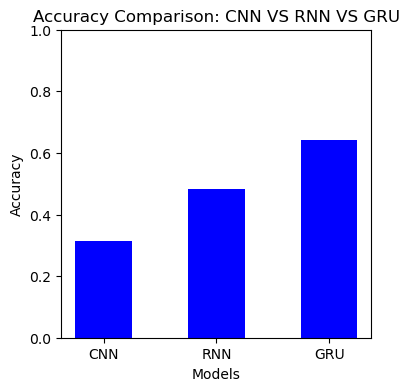

In [43]:
import matplotlib.pyplot as plt

# Sample data
label = ['CNN','RNN','GRU']
accuracies = [test_acc,test_acc1,test_acc2]

# Adjusting figure size
plt.figure(figsize=(4, 4))  # Change width and height as needed

# Plotting the bar graph
plt.bar(label, accuracies, color=['blue'], width=0.5)  # Adjust width as needed

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: CNN VS RNN VS GRU')
plt.ylim(0.0, 1.0)  # Set the y-axis limit from 0 to 1

# Display the plot
plt.show()